# Portfolio Selection

***Suppose a couple can invest in only two risky assets, A and B. The
expected return and standard deviation for asset A are 20% and 50%, and the expected return and standard deviation for asset B are 15% and 33%. The two assets have zero correlation with one another.***

*Calculating portfolio expected return and portfolio risk (standard deviation) if an investor invests 10% in A and the remaining 90% in B.*

In [1]:
Ra, Rb = .20, .15
std_a, std_b = .50, .33
wA, wB = .10, .90

print(f'Portfolio expected return = {((wA*Ra) + (wB*Rb))*100:.2f}%')

Portfolio expected return = 15.50%


In [2]:
print(f'Portfolio risk = {((((wA**2)*(std_a**2)) + ((wB**2)*(std_b**2)))**.5)*100:.2f}%')

Portfolio risk = 30.12%


*Generalizing the above calculations for portfolio return and risk by assuming an investment of wA in Asset A and an investment of (1-wA) in Asset B.*

In [3]:
def portfolio_return(wA):
    """
    Calculate the expected return of a portfolio consisting of
    two assets: A with E(R) of 20% and risk of 50%, and B with
    E(R) of 15% and risk 33%, by varying the weight of the portfolio 
    in Asset A
    """
    return .05*wA + .15

In [4]:
def portfolio_risk(wA):
    """
    Calculate the risk of a portfolio consisting of
    two assets: A with E(R) of 20% and risk of 50%, and B with
    E(R) of 15% and risk 33%, by varying the weight of the portfolio 
    in Asset A
    """
    return ((.3589*(wA**2)) - (.2178*wA) + .1089)**.5

### Plotting the investment opportunity set by varying wA from 0% to 100%

In [5]:
import matplotlib.pyplot as plt
import numpy as np

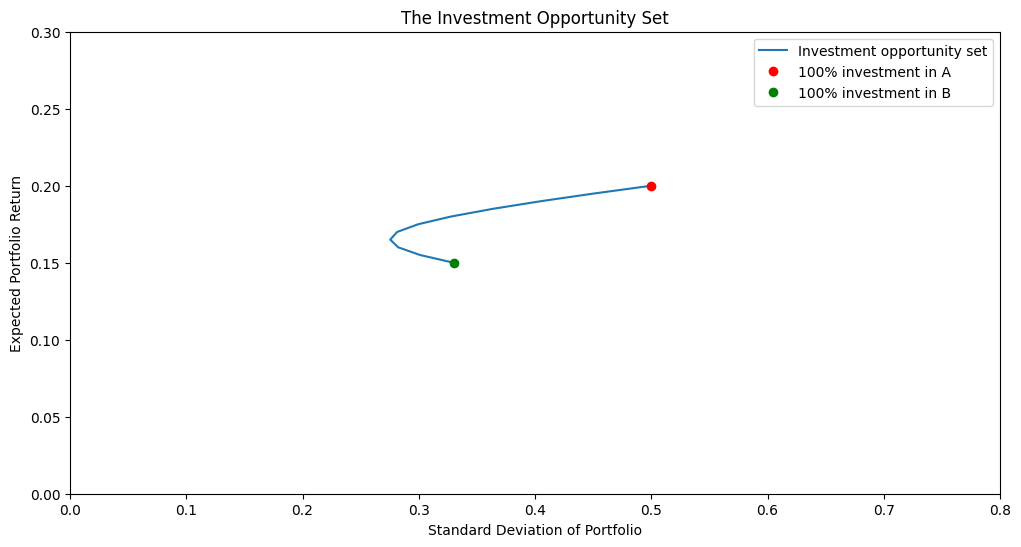

In [6]:
returns = [portfolio_return(x) for x in np.arange(0, 1.1, .10)]
risks = [portfolio_risk(x) for x in np.arange(0, 1.1, .10)]

fig, ax = plt.subplots(figsize=(12,6))
ax.plot(risks, returns, label='Investment opportunity set')
ax.plot(.5, .2, 'ro', label='100% investment in A')
ax.plot(.33, .15, 'go', label='100% investment in B')

ax.axis([0., .80, 0., .30])
ax.set_xlabel('Standard Deviation of Portfolio')
ax.set_ylabel('Expected Portfolio Return')
ax.set_title('The Investment Opportunity Set')
ax.legend()
xlabel = None

*Now we introduce a risk-free asset with a return of 3 percent, and write an equation for the capital allocation line in terms of wA that will connect the risk-free asset to the portfolio of risky assets.*

In [7]:
def CAL(wA, std):
    """
    The equation for the capital allocation line in terms of wA
    std is the risk of the new portfolio of two risky assets and one
    risk-free asset
    """
    return 0.03 + ((0.05*wA + 0.12)/portfolio_risk(wA))*std

The slope of the CAL is maximized when the weight in Asset A, wA, is 38.20%.
Substituting wA=38.20% in CAL() gives:

In [8]:
def CAL(std):
    """The equation for the capital allocation line"""
    return 0.03 + 0.4978*std

### Plotting the Capital Allocation Line after adding the risk-free asset

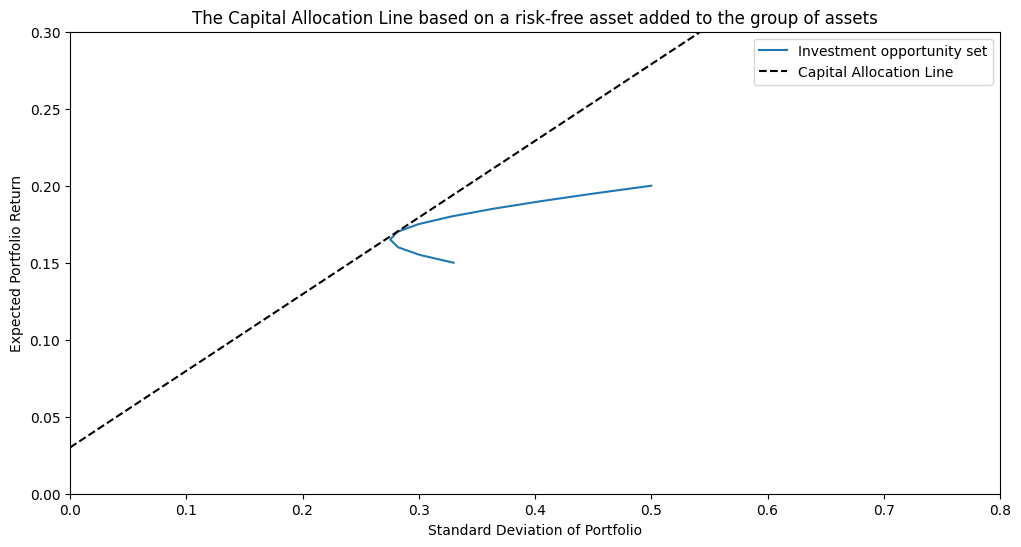

In [9]:
returns = [portfolio_return(x) for x in np.arange(0, 1.1, .10)]
risks = [portfolio_risk(x) for x in np.arange(0, 1.1, .10)]

fig, ax = plt.subplots(figsize=(12,6))
ax.plot(risks, returns, label='Investment opportunity set')
ax.axline((0,.03), slope=.4978, c='black', ls='--', label='Capital Allocation Line')

ax.axis([0., .80, 0., .30])
ax.set_xlabel('Standard Deviation of Portfolio')
ax.set_ylabel('Expected Portfolio Return')
ax.set_title('The Capital Allocation Line based on a risk-free asset added to the group of assets')
ax.legend()

### Plotting the Utility Curve

In [10]:
def utility(r, std):
    """
    Calculate the utility derived from a portfolio with return r,
    and risk (standard deviation) std.
    Assume the risk aversion coefficient, A, is 2.5
    """
    return r - (0.5*2.5*std*std)

In [11]:
def risk(r):
    """
    Calculate the risk of a portfolio that gives a return of r and
    is on the capital allocation line
    """
    return (r - 0.03) / 0.4978

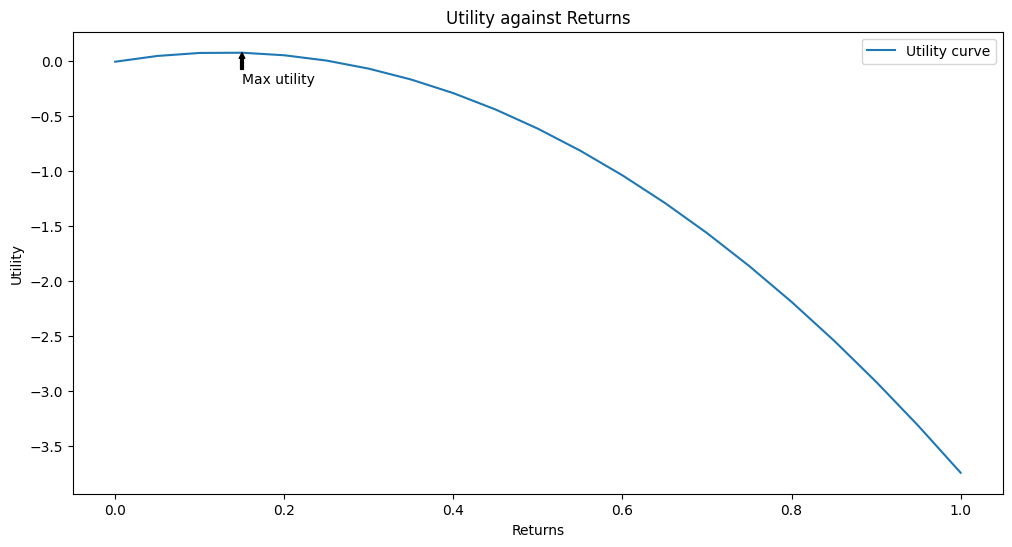

In [12]:
# Plotting utilities against returns
returns = np.arange(0., 1.01, .05)
utilities = [utility(r, risk(r)) for r in returns]

fig, ax = plt.subplots(figsize=(12,6))
ax.plot(returns, utilities, label='Utility curve')

ax.set_xlabel('Returns')
ax.set_ylabel('Utility')
ax.set_title('Utility against Returns')
ax.legend()

# Annotating the point of max utility
max_utility = max(utilities)
opt_return = 0
for r in returns:
    if utility(r, risk(r)) == max_utility:
        opt_return = r

ax.annotate('Max utility', 
            xy=(opt_return, max_utility),
            xytext=(opt_return, -.2),
            arrowprops=dict(facecolor='black', headwidth=4,
                            width=2, headlength=4))
xlabel=None

### Deriving the Optimal Investor Portfolio

In [13]:
r = opt_return
print(f'Based on the above graph, we would choose a portfolio with a return \
of {r*100:.1f}% and a standard deviation of {risk(r)*100:.1f}% because it \
has the highest utility: {utility(r, risk(r)):.4f}.')

Based on the above graph, we would choose a portfolio with a return of 15.0% and a standard deviation of 24.1% because it has the highest utility: 0.0774.


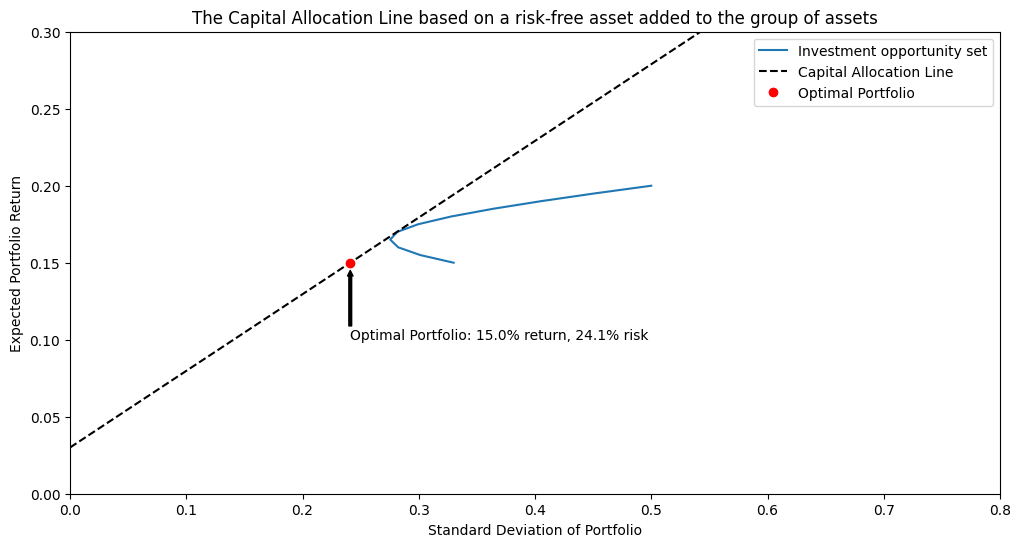

In [14]:
returns = [portfolio_return(x) for x in np.arange(0, 1.1, .10)]
risks = [portfolio_risk(x) for x in np.arange(0, 1.1, .10)]

fig, ax = plt.subplots(figsize=(12,6))
ax.plot(risks, returns, label='Investment opportunity set')
ax.axline((0,.03), slope=.4978, c='black', ls='--', label='Capital Allocation Line')
ax.plot(risk(opt_return), opt_return, 'ro', label='Optimal Portfolio')

text = f'Optimal Portfolio: {opt_return*100:.1f}% return, {risk(opt_return)*100:.1f}% risk'
ax.annotate(text, 
            xy=(risk(opt_return), opt_return-.005),
            xytext=(risk(opt_return), opt_return-.05),
            arrowprops=dict(facecolor='black', headwidth=4,
                            width=2, headlength=4))

ax.axis([0., .80, 0., .30])
ax.legend()
ax.set_xlabel('Standard Deviation of Portfolio')
ax.set_ylabel('Expected Portfolio Return')
ax.set_title('The Capital Allocation Line based on a risk-free asset added to the group of assets')
xlabel = None